Purpose of this Notebooks is to test the News-API (https://newsapi.org) 

In [1]:
!pip install newsapi-python
#!pip3 install requests
#!pip3 install newsapi-python


In [4]:
import pprint
import requests
from newsapi import NewsApiClient
import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
secret = '629525a47ff6458789d19a3c489419fa'
  
# Define the endpoint
url = 'https://newsapi.org/v2/everything'

# Get today's date
today = datetime.date.today()

# Get the date 2 years ago
two_years = today - datetime.timedelta(days=365*2)

# Function plots the percentage of results per each language - Input: Player

In [79]:
def plot_results_per_language(query):
    # Initialize the dictionary with the languages as keys
    results_per_language = {'de': 0, 'en': 0, 'es': 0}


    # Send a separate request for each language
    for lang in results_per_language.keys():
        parameters = {
            'q': query,
            'pageSize': 100,
            'apiKey': secret,
            'sortBy': 'publishedAt',
            'from': today,
            'to': two_years,
            'language': lang
        }
        response = requests.get(url, params=parameters)
        response_json = response.json()
        results_per_language[lang] = response_json['totalResults']

    # Calculate the total number of results
    total_results = sum(results_per_language.values())

    # Calculate the percentage of results for each language
    results_percentages = {k: v / total_results * 100 for k, v in results_per_language.items()}

    # Plot the results
    languages = list(results_per_language.keys())
    results = list(results_per_language.values())
    percentages = [f'{v:.1f}%' for v in results_percentages.values()]

    fig, ax = plt.subplots()

    ax.bar(languages, results)
    ax.set_title(f'Number of results per language for "{query}"')
    ax.set_xlabel('Language')
    ax.set_ylabel('Number of results')
    for i, v in enumerate(results):
        ax.text(i, v, percentages[i], ha='center', va='bottom')

    plt.show()


## Mitchel Bakker

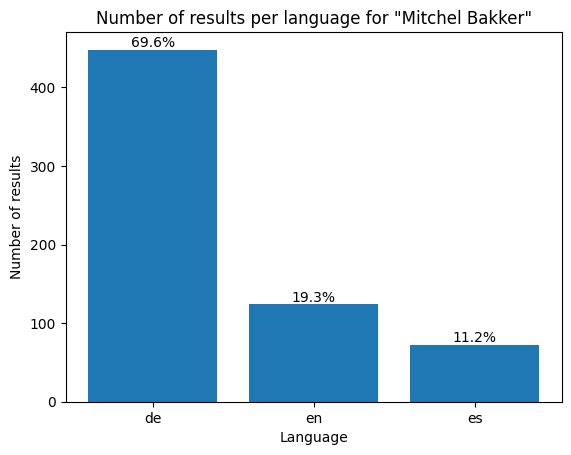

In [80]:
plot_results_per_language('Mitchel Bakker')

## Jeremie Frimpong

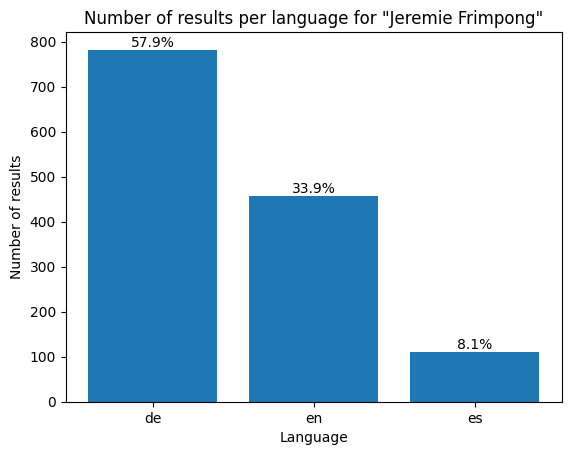

In [81]:
plot_results_per_language('Jeremie Frimpong')

## Moussa Diaby

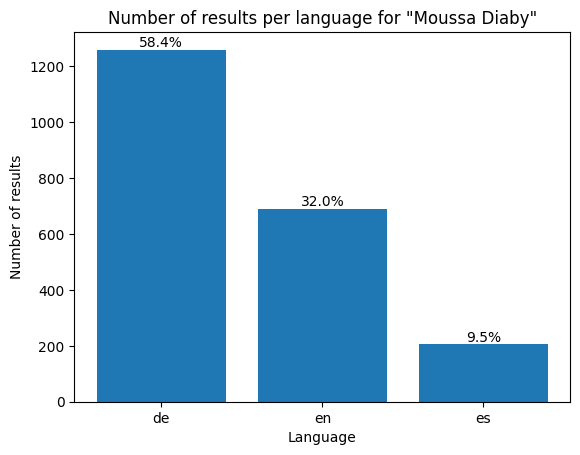

In [82]:
plot_results_per_language('Moussa Diaby')

## Jonathan Tah

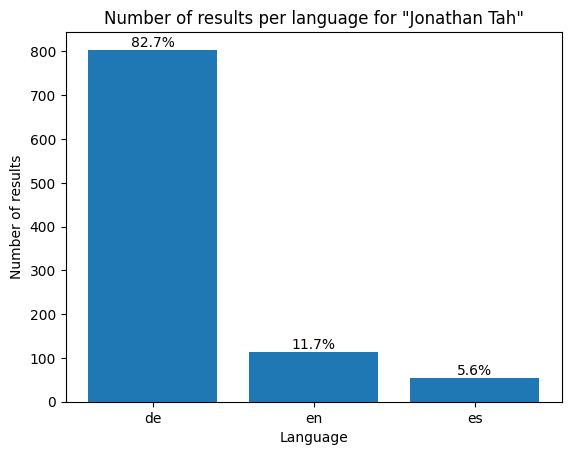

In [83]:
plot_results_per_language('Jonathan Tah')

## Piero Hincapié

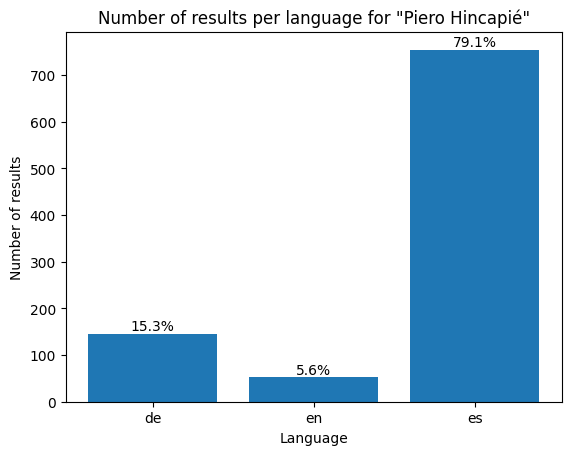

In [84]:
plot_results_per_language('Piero Hincapié')

## Exequiel Palacios

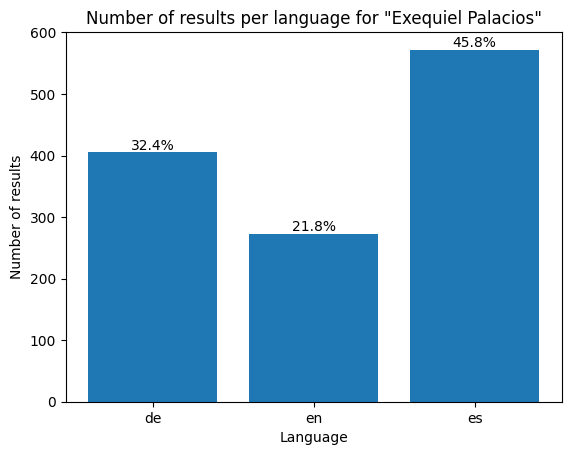

In [85]:
plot_results_per_language('Exequiel Palacios')

## Mykhaylo Mudryk

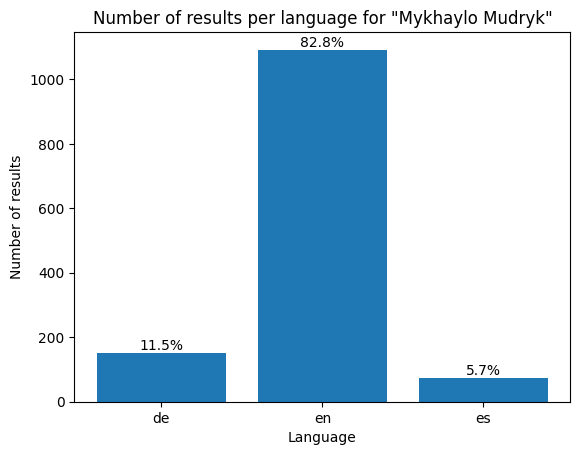

In [86]:
plot_results_per_language('Mykhaylo Mudryk')

## Leo Messi

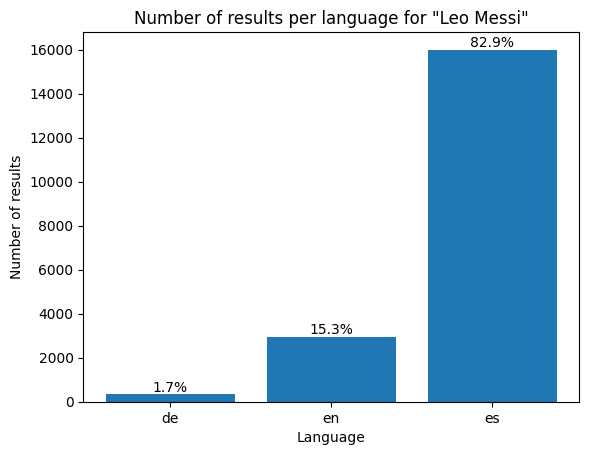

In [87]:
plot_results_per_language('Leo Messi')

# All players

In [8]:
def get_results_per_language(query):
    

    # Set the API parameters for the search
    parameters = {
        'q': query,
        'pageSize': 100,
        'apiKey': secret,
        'sortBy': 'publishedAt',
        'from': today,
        'to': two_years,
        'language': 'de'
    }

    # Initialize the results per language dictionary
    results_per_language = {
        'de': 0,
        'en': 0,
        'es': 0
    }

    # Search for results in each language
    for lang in results_per_language.keys():
        parameters['language'] = lang
        response = requests.get(url, params=parameters)
        response_json = response.json()
        if 'totalResults' in response_json:
            results_per_language[lang] = response_json['totalResults']
        else:
            print(f"No results found for language '{lang}' and query '{query}'")

    # Calculate the total number of results
    total_results = sum(results_per_language.values())

    # Calculate the percentage of results in each language
    percentages = {lang: count / total_results * 100 for lang, count in results_per_language.items()}

    # Add the results to a pandas DataFrame
    df = pd.DataFrame({
        'query': query,
        'total_results': total_results,
        'results_de': results_per_language['de'],
        'results_en': results_per_language['en'],
        'results_es': results_per_language['es'],
        'percent_de': percentages['de'],
        'percent_en': percentages['en'],
        'percent_es': percentages['es']
    }, index=[0])

    return df


In [10]:
players = ['Mitchel Bakker', 'Jeremie Frimpong', 'Moussa Diaby', 'Jonathan Tah', 'Piero Hincapié', 'Exequiel Palacios', 'Mykhaylo Mudryk', 'Leo Messi']

results = pd.concat([get_results_per_language(player) for player in players], ignore_index=True)

print(results)

               query  total_results  results_de  results_en  results_es  \
0     Mitchel Bakker            644         448         124          72   
1   Jeremie Frimpong           1350         782         458         110   
2       Moussa Diaby           2154        1259         690         205   
3       Jonathan Tah            972         804         114          54   
4     Piero Hincapié            953         146          53         754   
5  Exequiel Palacios           1250         405         273         572   
6    Mykhaylo Mudryk           1319         152        1092          75   
7          Leo Messi          19288         337        2957       15994   

   percent_de  percent_en  percent_es  
0   69.565217   19.254658   11.180124  
1   57.925926   33.925926    8.148148  
2   58.449396   32.033426    9.517177  
3   82.716049   11.728395    5.555556  
4   15.320042    5.561385   79.118573  
5   32.400000   21.840000   45.760000  
6   11.523882   82.789992    5.686126  
7   